Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

     billing       0.78      0.64      0.70        11
     general       0.20      0.20      0.20         5
   technical       0.50      0.75      0.60         4

    accuracy                           0.55        20
   macro avg       0.49      0.53      0.50        20
weighted avg       0.58      0.55      0.55        20



<ipython-input-3-b592aa93b306>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='case_type', palette='Set2')


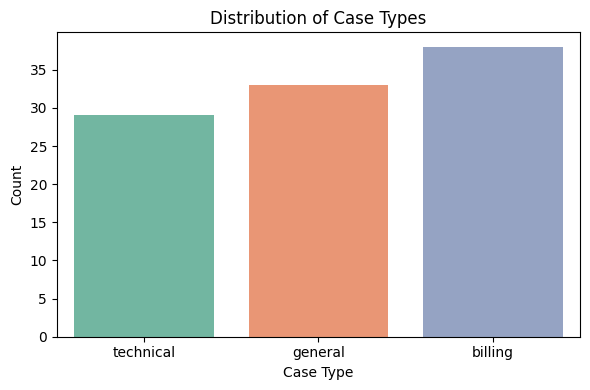

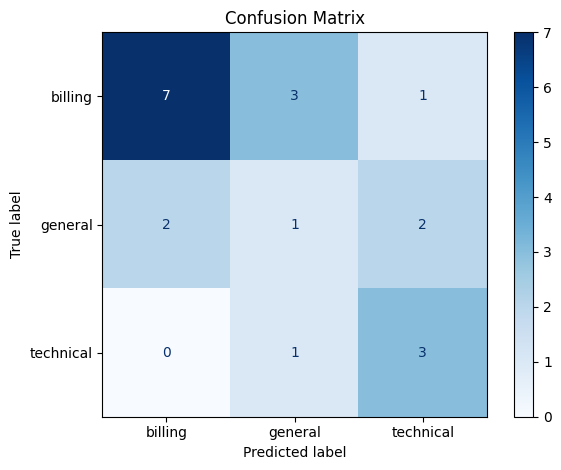

Prediction for a new case (length=250, response_time=20): general


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load your data
df = pd.read_csv("/content/support_cases.csv")  # Make sure your file is in the same folder or give the correct path

# Step 2: Feature and target selection
X = df[['message_length', 'response_time']]
y = df['case_type']

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot 1 - Distribution of Case Types
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='case_type', palette='Set2')
plt.title('Distribution of Case Types')
plt.xlabel('Case Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Step 7: Plot 2 - Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Step 8: Optional - Predict new case
def classify_case(message_length, response_time):
    input_data = pd.DataFrame([[message_length, response_time]], columns=['message_length', 'response_time'])
    prediction = model.predict(input_data)[0]
    return prediction

# Example prediction
print("Prediction for a new case (length=250, response_time=20):", classify_case(250, 20))
